In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Importing the dataset 
DATAPATH = 'letters.csv' #To Specify the file path for the air quality data.

data = pd.read_csv(DATAPATH)
data.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [4]:
data.describe()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,29.000000,21.000000,0.000000,...,10.000000,247.000000,250.000000,191.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
data.isnull().sum() #Identifying NA values

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [6]:
# Extracting features (X) and target variable (y)
X = data.drop('label', axis=1)  
y = data['label']  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Forecasting Test Set Result
y_pred = knn.predict(X_test_scaled)

# Analyzing the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)


Accuracy of the KNN model: 0.6455952380952381


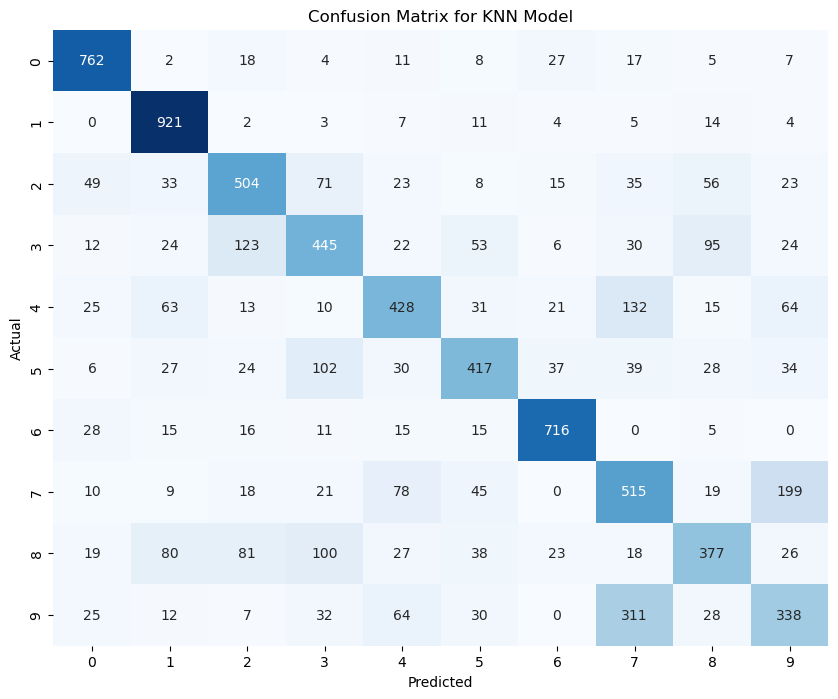

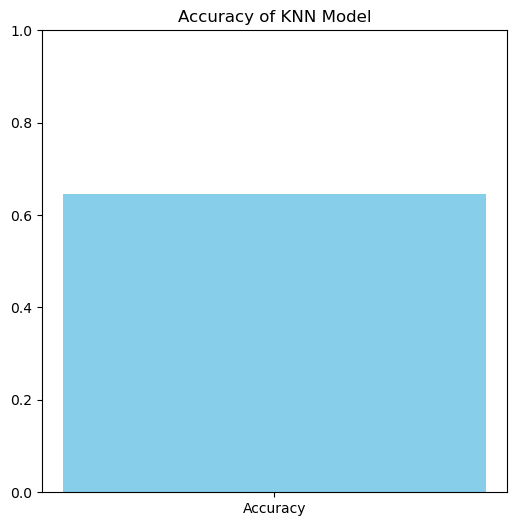

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar plot for accuracy
plt.figure(figsize=(6, 6))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.title('Accuracy of KNN Model')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for accuracy
plt.show()

In [8]:
# Splitting the dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the neural network model:", accuracy)

Accuracy of the neural network model: 0.6772619047619047


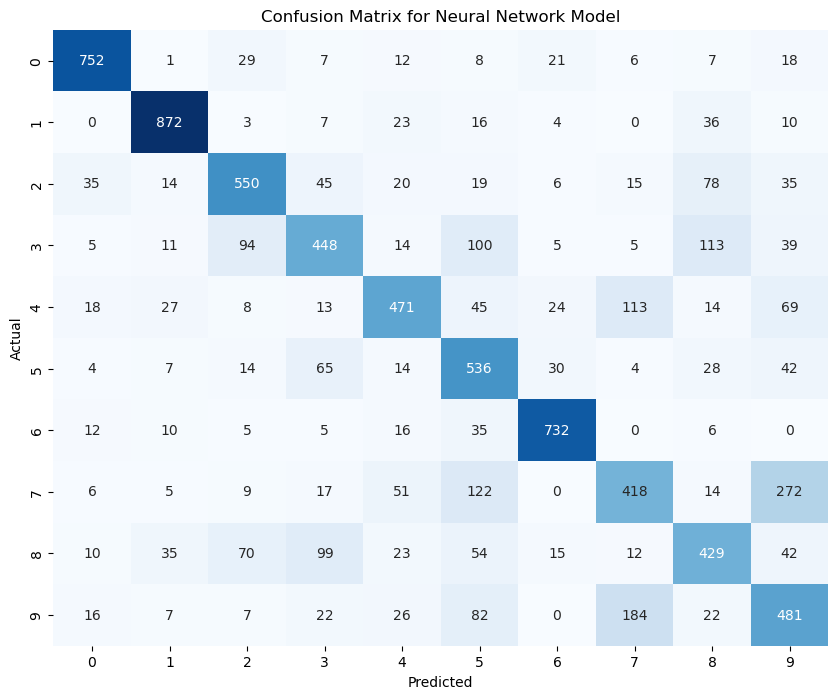

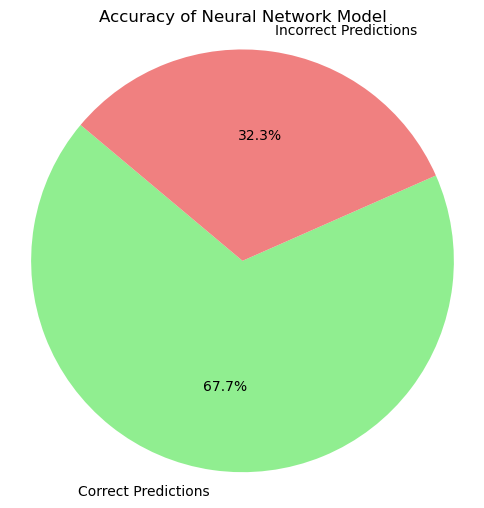

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Neural Network Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Pie chart for accuracy
plt.figure(figsize=(6, 6))
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [cm.diagonal().sum(), cm.sum() - cm.diagonal().sum()]
colors = ['lightgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy of Neural Network Model')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Define a function to evaluate models
def evaluate_model(model, X_test_scaled, y_test):
    # Predictions
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    training_time = end_time - start_time
    
    return accuracy, precision, recall, f1, training_time

# Evaluate KNN model
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_training_time = evaluate_model(knn, X_test_scaled, y_test)

# Evaluate MLPClassifier model
mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_training_time = evaluate_model(model, X_test_scaled, y_test)

# Print results
print("KNN Model:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print("Training Time:", knn_training_time)

print("\nMLPClassifier Model:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)
print("Training Time:", mlp_training_time)

# Summarize findings and suggest final model
if knn_accuracy > mlp_accuracy:
    print("\nBenchmarking measures show that the KNN model performs better than the MLPClassifier model..")
    print("Consequently, the KNN model is the last model that is recommended for the school to utilize.")
else:
    print("\nBenchmarking measures show that the MLPClassifier model performs better than the KNN model..")
    print("Consequently, the MLPClassifier model is the last model that is recommended for the school to utilize.")


KNN Model:
Accuracy: 0.6455952380952381
Precision: 0.639428954997692
Recall: 0.6455952380952381
F1-score: 0.6395754279917625
Training Time: 0.9215364456176758

MLPClassifier Model:
Accuracy: 0.6772619047619047
Precision: 0.6820730277070176
Recall: 0.6772619047619047
F1-score: 0.6766227248940616
Training Time: 0.015619993209838867

Benchmarking measures show that the MLPClassifier model performs better than the KNN model..
Consequently, the MLPClassifier model is the last model that is recommended for the school to utilize.


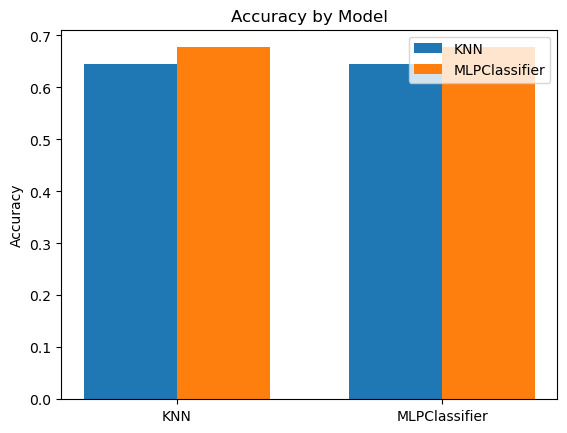

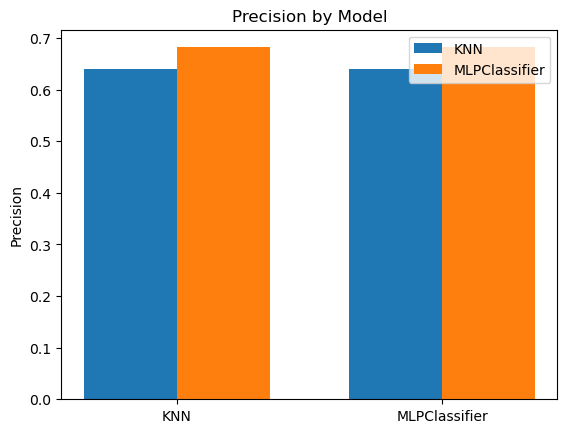

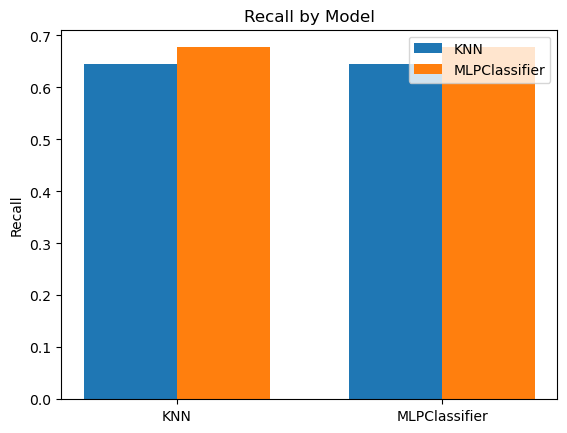

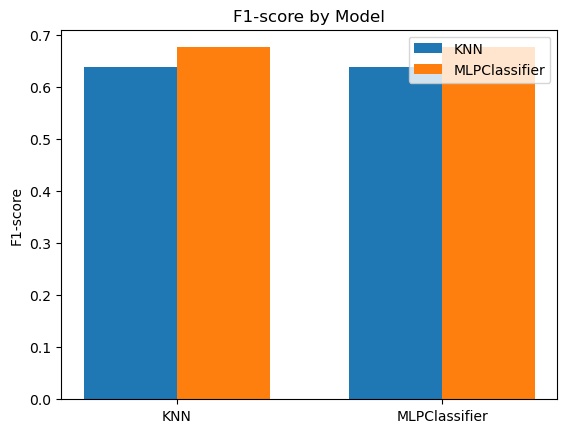

In [13]:
# Define function to plot metrics
def plot_metrics(knn_metrics, mlp_metrics, metric_name):
    labels = ['KNN', 'MLPClassifier']
    knn_values = knn_metrics[metric_name]
    mlp_values = mlp_metrics[metric_name]

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, knn_values, width, label='KNN')
    rects2 = ax.bar([i + width for i in x], mlp_values, width, label='MLPClassifier')

    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} by Model')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Create dictionary to store metrics
knn_metrics = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1-score': knn_f1
}

mlp_metrics = {
    'Accuracy': mlp_accuracy,
    'Precision': mlp_precision,
    'Recall': mlp_recall,
    'F1-score': mlp_f1
}

# Plot metrics
for metric_name in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    plot_metrics(knn_metrics, mlp_metrics, metric_name)
